### Ceilin Joel Carcamo Vasquez - 20201000429
### Saul Eduardo Torres Vega - 20201004758

# Importación de librerias

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import truncnorm

# Lectura del DataSet

In [78]:
df = pd.read_csv("StudentsPerformance.csv")

# Número de filas y columnas de DataSet

In [79]:
df.shape

(1000, 7)

# DataSet con sus caracteristicas principales

In [81]:
df

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,female,group B,standard,none,72,72,74
1,female,group C,standard,completed,69,90,88
2,female,group B,standard,none,90,95,93
3,male,group A,free/reduced,none,47,57,44
4,male,group C,standard,none,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,standard,completed,88,99,95
996,male,group C,free/reduced,none,62,55,55
997,female,group C,free/reduced,completed,59,71,65
998,female,group D,standard,completed,68,78,77


# Análisis de columnas y tipos de datos

In [82]:
df.dtypes

gender                     object
race/ethnicity             object
lunch                      object
test preparation course    object
math score                  int64
reading score               int64
writing score               int64
dtype: object

# Renombrar columnas

In [83]:
df.columns = ['gender', 'race', 'lunch', 'testPreparation',
       'mathScore', 'readingScore', 'writingScore']

In [84]:
df.head(0)

,gender,race,lunch,testPreparation,mathScore,readingScore,writingScore


# Obtencion de las columnas categoricas y numericas en una lista separada

In [85]:
cat_cols = []
for c in df.columns:
    if df[c].dtype == 'object':
        cat_cols.append(c)

num_cols = []
for p in df.columns:
    if df[p].dtype == 'int64' or df[p].dtype == 'float64':
        num_cols.append(p)

In [87]:
#Columnas categoricas
cat_cols

['gender', 'race', 'lunch', 'testPreparation']

In [88]:
#Columnas númericas
num_cols

['mathScore', 'readingScore', 'writingScore']

# Descripcion de las columnas númericas

In [89]:
df[num_cols].describe()

,mathScore,readingScore,writingScore
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Histogramas de las variables numericas

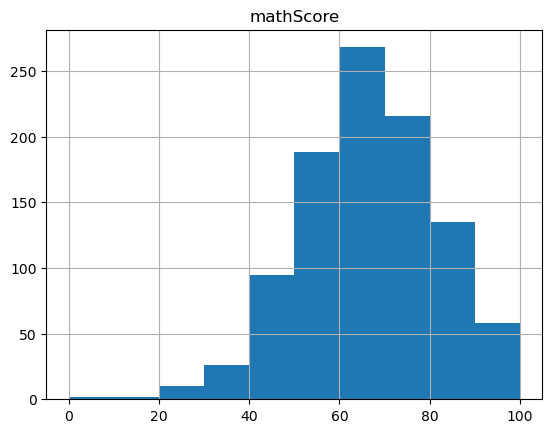

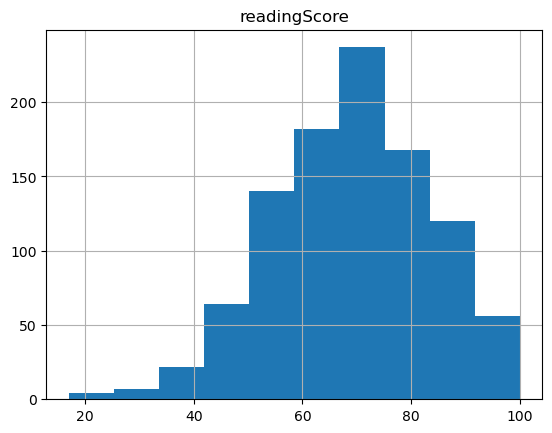

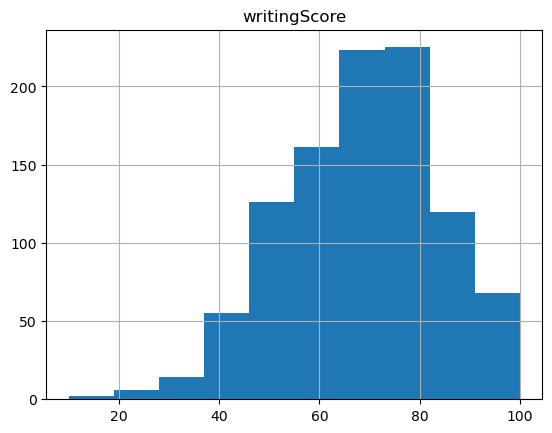

In [90]:
for c in num_cols:
    df.loc[:,[c]].hist()
    plt.show()

# Boxplot de las variables númericas

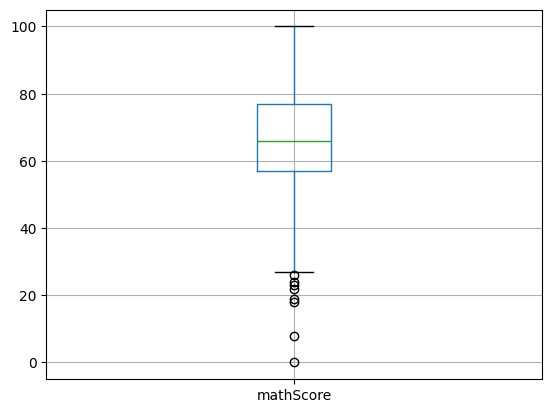

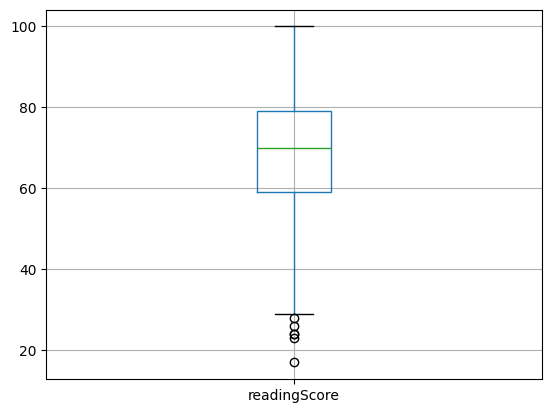

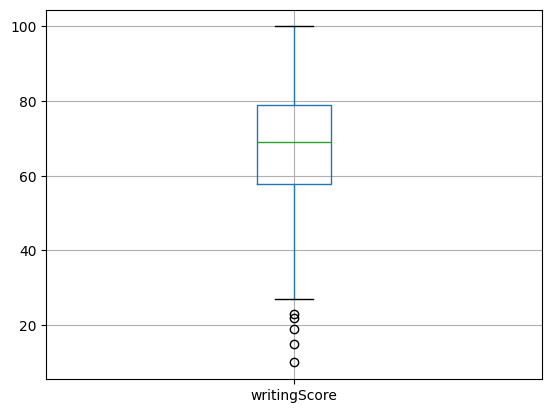

In [16]:
for c in num_cols:
    df.loc[:,[c]].boxplot()
    plt.show()

# Corte categorico #1

## Seleccion de columnas categorícas 'gender', 'race', 'testPreparation' con respecto a la columna númerica 'mathScore'

Los siguientes dos ejemplos son un boxplot de un corte categorico para un grupo especifico de personas, basandonos en su genero, el grupo al que pertenecen y si se prepararon antes del examen o no, y nos interesa conocer sobre sus resultados en el examen de matematicas.
En el primer ejemplo podemos observar que hay valores atipicos tanto arriba del limite superior como abajo del limite inferior.
En el segundo ejemplo, podemos observar que solo existen valores atipicos abajo del limite inferior.
Esperamos que con la limpieza se eliminen la mayoria de estos valores.

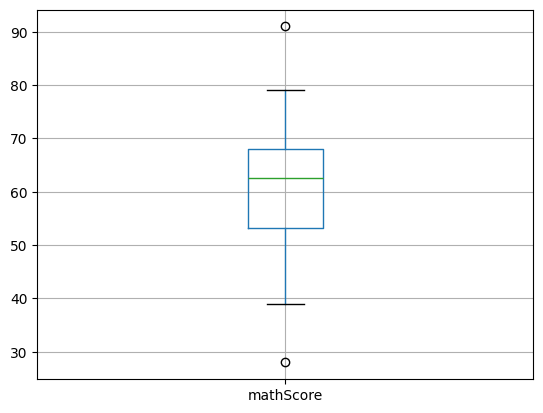

In [17]:
df.loc[(df["gender"]=='male')
       & (df["race"]=='group A')
       & (df['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

# Corte categorico #2

## Seleccion de columnas categorícas 'gender', 'race', 'testPreparation' con respecto a la columna númerica 'mathScore'

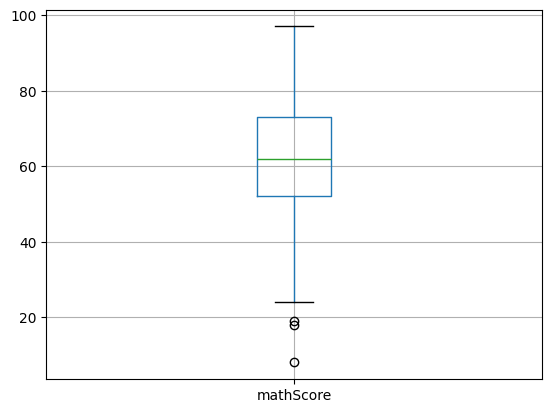

In [18]:
df.loc[(df["gender"]=='female')
       & (df["race"]=='group B')
       & (df['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

El siguiente bloque de codigo seria el calculo del limite inferior y limite superior. Utilizamos funciones lambda para ello, en este caso el x sera una Serie de Pandas, con todos los valores de las columnas numericas dentro de las columnas categoricas y sus combinaciones.

In [19]:
transformations = {}
new_cols = []
for c in num_cols:
    transformations[c] = [
        ( "lower_bound" , lambda x: x.quantile(.25) - 1.5*(x.quantile(.75) - x.quantile(.25))  ),
        ( "upper_bound" , lambda x: x.quantile(.75) + 1.5*(x.quantile(.75) - x.quantile(.25))  )
    ]
    new_cols.append(f"{c}_lower_bound")
    new_cols.append(f"{c}_upper_bound")

Ahora df_resultados sera un dataframe que va a agrupar segun las categorias de nuestro dataset. Agregara el diccionario transformations de arriba, y junto con este ira la funcion lambda, la cual se ejecutara sobre el groupby, obteniendo los limites por cada grupo de las combinaciones de las categorias.

In [76]:
df_resultados = df.groupby(cat_cols, as_index=False).agg(transformations)
df_resultados.columns = cat_cols + new_cols

df_resultados.head(5)

,gender,race,lunch,testPreparation,mathScore_lower_bound,mathScore_upper_bound,readingScore_lower_bound,readingScore_upper_bound,writingScore_lower_bound,writingScore_upper_bound
0,female,group A,free/reduced,completed,11.25,97.25,19.0,99.0,17.50,105.50
1,female,group A,free/reduced,none,24.50,72.50,36.0,84.0,27.25,85.25
2,female,group A,standard,completed,45.50,97.50,67.0,99.0,53.50,113.50
3,female,group A,standard,none,36.00,76.00,38.0,94.0,50.50,86.50
4,female,group B,free/reduced,completed,28.00,92.00,45.0,101.0,38.50,106.50


df_bound sera una combinacion (Inner Join) del dataframe original con el que acabamos de hacer.

In [21]:
df_bound = df.merge(
    df_resultados,on=cat_cols,how="inner"
)

El siguiente codigo nos obtiene todos los valores atipicos que existen en la columna "mathScore".

In [22]:
df_bound.loc[
    (df_bound["mathScore"] <= df_bound["mathScore_lower_bound"])
    |
    (df_bound["mathScore"] >= df_bound["mathScore_upper_bound"])
    ,
    cat_cols + ["mathScore","mathScore_lower_bound","mathScore_upper_bound"]
]

,gender,race,lunch,testPreparation,mathScore,mathScore_lower_bound,mathScore_upper_bound
6,female,group B,standard,completed,88,42.500,84.500
59,female,group C,free/reduced,none,0,8.250,94.250
76,male,group E,standard,none,30,42.375,111.375
91,male,group C,free/reduced,none,27,40.750,84.750
211,male,group C,free/reduced,none,35,40.750,84.750
288,male,group B,free/reduced,none,88,25.875,84.875
455,male,group C,free/reduced,none,37,40.750,84.750
474,female,group B,standard,completed,90,42.500,84.500
501,female,group B,standard,completed,94,42.500,84.500
571,male,group A,standard,none,91,39.750,85.750


El siguiente codigo nos obtiene todos los valores que se quedaran despues de limpiar los valores atipicos. O sea, los valores que no son atipicos

In [23]:
df_bound.loc[
    (df_bound["mathScore"] > df_bound["mathScore_lower_bound"])
    &
    (df_bound["mathScore"] < df_bound["mathScore_upper_bound"])
    ,
    :
]

,gender,race,lunch,testPreparation,mathScore,readingScore,writingScore,mathScore_lower_bound,mathScore_upper_bound,readingScore_lower_bound,readingScore_upper_bound,writingScore_lower_bound,writingScore_upper_bound
0,female,group B,standard,none,72,72,74,28.500,100.500,31.750,113.750,33.750,107.750
1,female,group C,standard,completed,69,90,88,36.125,101.125,49.625,112.625,58.625,105.625
2,female,group B,standard,none,90,95,93,28.500,100.500,31.750,113.750,33.750,107.750
3,male,group A,free/reduced,none,47,57,44,19.000,95.000,8.250,110.250,12.000,96.000
4,male,group C,standard,none,76,78,75,33.750,103.750,28.250,102.250,22.250,100.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,standard,completed,88,99,95,45.500,113.500,54.000,110.000,49.000,121.000
996,male,group C,free/reduced,none,62,55,55,40.750,84.750,41.625,82.625,35.500,81.500
997,female,group C,free/reduced,completed,59,71,65,25.250,91.250,46.250,100.250,45.750,103.750
998,female,group D,standard,completed,68,78,77,45.500,99.500,60.750,98.750,57.875,110.875


# Limpieza de los valores atipicos

Definiremos una funcion que recibira el dataframe que creamos con los limites y un arreglo que contiene las columnas numericas. Utilizando la misma logica que el ejemplo anterior para obtener los valores que no son atipicos, realizamos la funcion

Nota: El dataframe que recibe esta funcion, debe tener siempre columnas del tipo {nombre columna}_lower_bound y {nombre columna}_upper_boun

In [25]:
def limpiarAtipicos(df,numericColumns):
    for c in numericColumns:
        print(df.shape[0])
        df = df.loc[ (df[c] > df[f"{c}_lower_bound"]) & (df[c] < df[f"{c}_upper_bound"]) , : ]

    return df
        

### Antes de limpiar los valores atipicos de df_bound

In [26]:
df_bound.shape

(1000, 13)

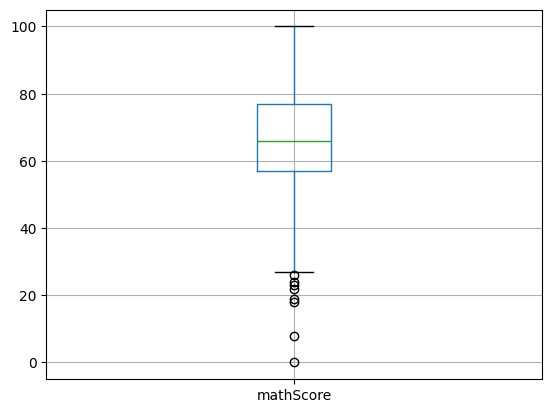

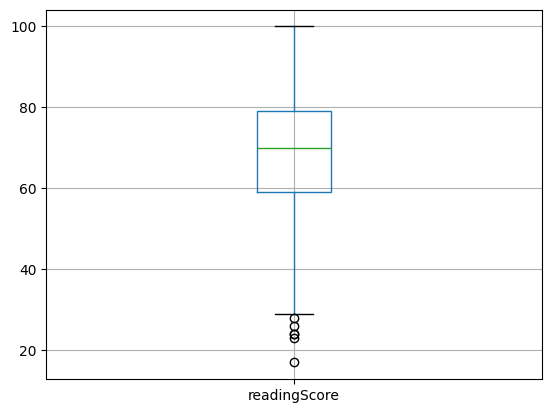

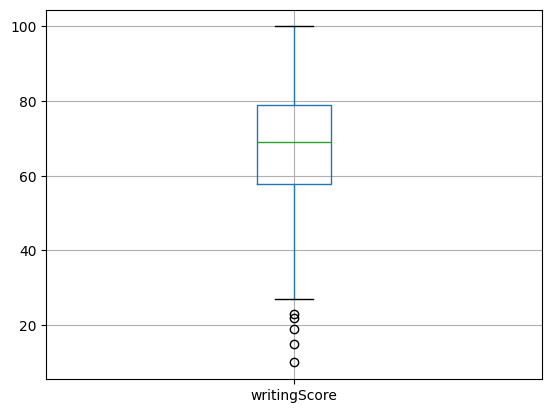

In [27]:
for c in num_cols:
    df_bound.loc[:,[c]].boxplot()
    plt.show()

### Despues de limpiar los valores atipicos de df_bound

In [28]:
df_bound = limpiarAtipicos(df_bound, num_cols)

1000
982
969


De 1000 registros, ahora tenemos 963 despues de la limpieza

In [29]:
df_bound.shape

(963, 13)

Ahora ya limpiados los valores atipicos, veremos los boxplot de las categorias numericas. Podemos observar que en muchos casos, segun el diagrama de caja aun existen valores fuera de los cuartiles, pero estos valores tienen mucha menos dispersion que los presentados al inicio de este notebook.

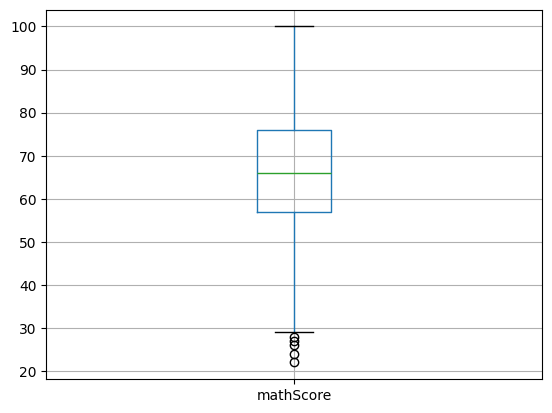

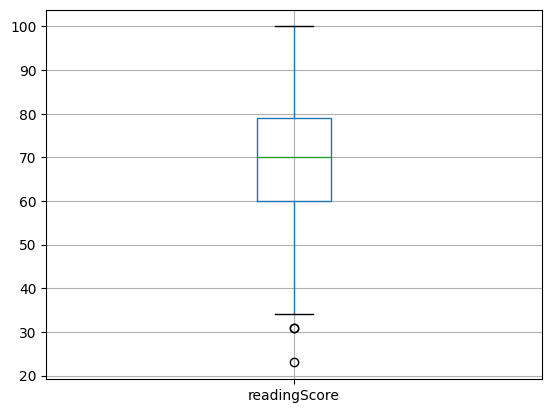

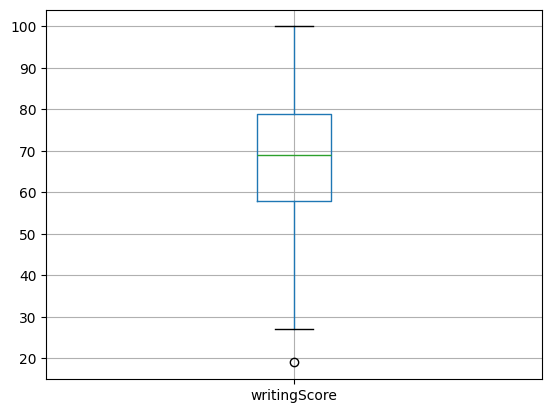

In [30]:
for c in num_cols:
    df_bound.loc[:,[c]].boxplot()
    plt.show()

Se eliminaron el 3.7% de los registros despues de la limpieza

In [31]:
1 - 963/1000

0.03700000000000003

# Casos de los cortes categoricos

## Corte categorico #1

En este caso, podemos ver una reduccion notoria de los valores atipicos de este corte categorico.



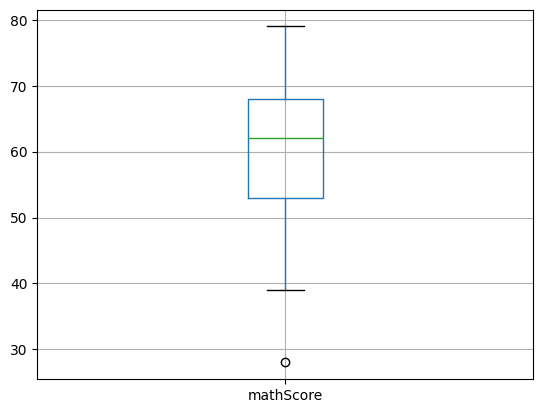

In [32]:
df_bound.loc[(df["gender"]=='male')
       & (df_bound["race"]=='group A')
       & (df_bound['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

## Corte categorico #2

En este caso se eliminaron todos los valores atipicos, teniendo un boxplot perfecto

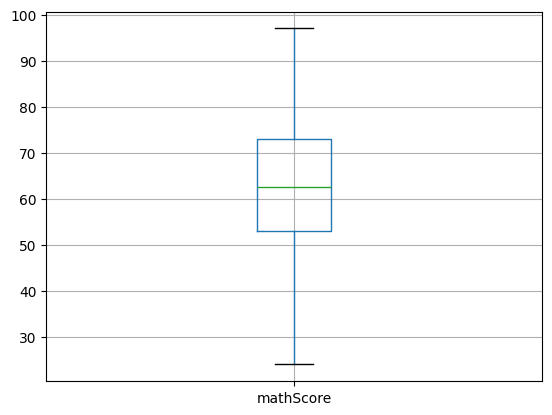

In [33]:
df_bound.loc[(df_bound["gender"]=='female')
       & (df_bound["race"]=='group B')
       & (df_bound['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

## Prologo a la expansion del dataset

Crearemos un nuevo dataframe que solo contenga las columnas cateogircas y numericas, ya no necesitamos los valores de los limites. Este dataframe df_clean sera el dataframe sin valores atipicos

In [34]:
df_clean = df_bound.loc[:,cat_cols+num_cols]

En el siguiente bloque, solamente tenemos un ejemplo o recordatorio que podemos obtener los valores minimos, maximos, promedios y desviacion estandar de la siguiente forma

In [35]:
df_clean.groupby(
    cat_cols, as_index=False
).agg({
    'mathScore':["min","max","mean","std"]
})

gender     race         lunch testPreparation mathScore                  \
                                                        min  max       mean   
0   female  group A  free/reduced       completed        34   77  54.666667   
1   female  group A  free/reduced            none        37   61  47.000000   
2   female  group A      standard       completed        59   85  71.714286   
3   female  group A      standard            none        45   71  56.416667   
4   female  group B  free/reduced       completed        46   77  62.562500   
5   female  group B  free/reduced            none        24   78  57.700000   
6   female  group B      standard       completed        50   77  61.714286   
7   female  group B      standard            none        37   97  65.108696   
8   female  group C  free/reduced       completed        42   82  60.227273   
9   female  group C  free/reduced            none        22   77  50.578947   
10  female  group C      standard       completed        52   96  70.288889   
11  female  group C      standard            none        39   91  65.549296   
12  female  group D  free/reduced       completed        35   93  62.050000   
13  female  group D  free/reduced            none        26   79  55.451613   
14  female  group D      standard       completed        56   88  71.650000   
15  female  group D      standard            none        45   98  68.851852   
16  female  group E  free/reduced       completed        42   92  67.428571   
17  female  group E  free/reduced            none        32   81  58.625000   
18  female  group E      standard       completed        59   99  79.176471   
19  female  group E      standard            none        37  100  73.448276   
20    male  group A  free/reduced       completed        40   81  61.714286   
21    male  group A  free/reduced            none        28   79  57.133333   
22    male  group A      standard       completed        46  100  72.583333   
23    male  group A      standard            none        51   77  62.611111   
24    male  group B  free/reduced       completed        49   87  67.250000   
25    male  group B  free/reduced            none        40   75  56.157895   
26    male  group B      standard       completed        51   94  73.560000   
27    male  group B      standard            none        47   90  66.838710   
28    male  group C  free/reduced       completed        40   79  58.600000   
29    male  group C  free/reduced            none        49   80  64.178571   
30    male  group C      standard       completed        51   98  77.285714   
31    male  group C      standard            none        46   97  69.135593   
32    male  group D  free/reduced       completed        55   84  71.000000   
33    male  group D  free/reduced            none        42   90  63.064516   
34    male  group D      standard       completed        58   89  73.782609   
35    male  group D      standard            none        40   95  70.843750   
36    male  group E  free/reduced       completed        70   91  79.888889   
37    male  group E  free/reduced            none        46   93  69.600000   
38    male  group E      standard       completed        62   99  79.863636   
39    male  group E      standard            none        53   97  77.344828   

               
          std  
0   21.548395  
1    8.082904  
2    8.635475  
3    7.867752  
4   10.359979  
5   14.205633  
6    7.258190  
7   13.906399  
8   10.756756  
9   13.167592  
10  11.592753  
11  12.069784  
12  14.982358  
13  14.626092  
14   8.634539  
15  11.752812  
16  17.174178  
17  14.573378  
18  12.151313  
19  15.621840  
20  16.059413  
21  14.166695  
22  17.312415  
23   7.365571  
24  13.068501  
25  10.150332  
26  12.325718  
27  12.050164  
28  11.245584  
29   8.463663  
30  13.745995  
31  12.608779  
32   9.015139  
33  11.386938  
34   8.800602  
35  13.930917  
36   6.827233  
37  21.007142  
38  10.521160  
39  11.814869

Crearemos un diccionario que contendra los valores minimos, maximos, promedio y desviacion estandar de todas las columnas numericas. Ademas crearemos un arreglo que contendra una lista de nombres, estos seran la columna numerica con el respectivo valor que contiene (minimo, maximo, promedio o desviacion estandar)

In [36]:
summ_aggregations = {}
cols_summ = []
for c in num_cols:
    summ_aggregations[c] = ["min","max","mean","std"]
    cols_summ.append(f"{c}_min")
    cols_summ.append(f"{c}_max")
    cols_summ.append(f"{c}_mean")
    cols_summ.append(f"{c}_std")

Creamos otro dataframe que contendra lo mismo del dataframe limpio, pero le agregaremos el diccionario anterior

In [37]:
df_summ = df_clean.groupby(
    cat_cols, as_index=False
).agg(summ_aggregations)

Cambiamos el nombre de las columnas con el arreglo anteriormente hecho

In [38]:
df_summ.columns = cat_cols + cols_summ

In [75]:
df_summ.head(2)

,gender,race,lunch,testPreparation,mathScore_min,mathScore_max,mathScore_mean,mathScore_std,readingScore_min,readingScore_max,readingScore_mean,readingScore_std,writingScore_min,writingScore_max,writingScore_mean,writingScore_std
0,female,group A,free/reduced,completed,34,77,54.666667,21.548395,48,88,62.000000,22.538855,41,85,62.000000,22.068076
1,female,group A,free/reduced,none,37,65,48.636364,9.394389,43,85,60.818182,12.172249,43,76,57.272727,11.118371


## Expandir el Dataset

### Obtencion de Distribuciones probabilisticas

Vamos a obtener las distribuciones probabilisticas. Esta sera la frecuencia con la que cada combinacion de categoria puede ocurrir. Nota: Como no tenemos un identificador unico en cada registro del dataset, vamos a usar una variable numerica para el conteo

In [40]:
prob_freq = df.groupby(cat_cols, as_index=False).agg({
    #Se utiliza el mathScore ya que el dataset no cuenta con un userID. 
    "mathScore": ["count"]
})

prob_freq.columns = cat_cols + ["count"]

prob_freq["freq"] = prob_freq["count"] / df.shape[0]

In [41]:
prob_freq

,gender,race,lunch,testPreparation,count,freq
0,female,group A,free/reduced,completed,3,0.003
1,female,group A,free/reduced,none,11,0.011
2,female,group A,standard,completed,9,0.009
3,female,group A,standard,none,13,0.013
4,female,group B,free/reduced,completed,17,0.017
5,female,group B,free/reduced,none,22,0.022
6,female,group B,standard,completed,18,0.018
7,female,group B,standard,none,47,0.047
8,female,group C,free/reduced,completed,23,0.023
9,female,group C,free/reduced,none,39,0.039


In [44]:
cant_expnd = 100000



En el siguiente bloque de codigo vamos a hacer identificadores unicos por cada combinacion de categorias que tengamos. Esto se hara con la funcion np.random.choice y vamos a usar el valor prob_freq.index para estos ids.


In [46]:
ids = np.random.choice(prob_freq.index, size=cant_expnd, p=prob_freq["freq"].to_list())



El prob_freq.index podemos decirlo que es como un for in range. Tenemos el valor de start que es desde donde comenzara, el stop que es donde se va a detener y el step que sera el incremento que tendra


In [74]:
prob_freq.index

RangeIndex(start=0, stop=40, step=1)



Aqui tenemos un poco el ejemplo de como funcionara la expansion. Se explicaran los siguientes 3 bloques de codigo

1. Esta sera la cantidad de valores simulados que tendra la primera combinacion de las categorias.
2. Este es la cantidad total de los valores simulados.
3. Esta es la proporcion con la que se hara.



In [72]:
len(ids[ids==0])

265

In [48]:
len(ids)

100000

In [73]:
len(ids[ids==0])/len(ids)

0.00265

Definimos una funcion para utilizar la funcion truncnorm.rvs(). Con esta funcion vamos a simular nuestro dataset

In [50]:
def trunc_vector(min_val, max_val, media, desv_std,size):
    a,b = (min_val - media) / desv_std, (max_val - media) / desv_std
    muestras = truncnorm.rvs(a,b,loc=media,scale=desv_std,size=size)

    return muestras

In [71]:
df_summ.head(2)

,gender,race,lunch,testPreparation,mathScore_min,mathScore_max,mathScore_mean,mathScore_std,readingScore_min,readingScore_max,readingScore_mean,readingScore_std,writingScore_min,writingScore_max,writingScore_mean,writingScore_std
0,female,group A,free/reduced,completed,34,77,54.666667,21.548395,48,88,62.000000,22.538855,41,85,62.000000,22.068076
1,female,group A,free/reduced,none,37,65,48.636364,9.394389,43,85,60.818182,12.172249,43,76,57.272727,11.118371




El siguiente bloque de codigo contiene la expansion del dataset. Vamos a definir un dataframe donde lo vamos a almacenar, y vamos a realizar un ciclo for para recorrer por la cantidad de combinaciones de categorias que tenemos. Vamos a iniciar con un diccionario que contendra el id de la combinacion de la categoria. El siguiente ciclo for, anidado al primero sera para recorrer por todas las categorias numericas, esto con el fin de utilizar nuestra funcion para usar el truncnorm.rvs(). Finalizando, vamos a obtener la cantidad de combinacion de categoria y asignarlo al registro al que este pertenece

Por ultimo, este diccionario se lo asignaremos a un dataframe temporal, y se concatenan el temporal con el dataframe que contendra el dataframe extendido. Sera como un acumulador, por cada iteracion del ciclo


In [52]:
df_extended = pd.DataFrame()

for i in prob_freq.index:
    setting = {
        "id": ids[ids == i]
    }
    for c in num_cols:
        setting[c] = trunc_vector(
            df_summ.iloc[i][f"{c}_min"],
            df_summ.iloc[i][f"{c}_max"],
            df_summ.iloc[i][f"{c}_mean"],
            df_summ.iloc[i][f"{c}_std"],
            len(ids[ids==i])
        )
    
    tmp = pd.DataFrame(setting)
    df_extended = pd.concat([df_extended, tmp])

Dataset Limpio

In [53]:
df_clean.describe()

,mathScore,readingScore,writingScore
count,963.000000,963.000000,963.000000
mean,66.467290,69.510903,68.400831
std,14.169516,13.753119,14.336514
min,22.000000,23.000000,19.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,76.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [56]:
prob_freq["id"] = prob_freq.index

In [67]:
extended = prob_freq.loc[:, ["id"] + cat_cols].merge(
    df_extended, on=["id"],how="inner"
)

extended

,id,gender,race,lunch,testPreparation,mathScore,readingScore,writingScore
0,0,female,group A,free/reduced,completed,62.903248,72.605612,44.453648
1,0,female,group A,free/reduced,completed,66.359451,61.497867,54.166920
2,0,female,group A,free/reduced,completed,68.429052,81.085676,84.222967
3,0,female,group A,free/reduced,completed,69.981944,49.996947,47.401150
4,0,female,group A,free/reduced,completed,67.163721,64.536424,50.633059
...,...,...,...,...,...,...,...,...
99995,39,male,group E,standard,none,87.838511,83.398602,64.190314
99996,39,male,group E,standard,none,84.580693,75.128394,55.007286
99997,39,male,group E,standard,none,66.988970,70.374719,75.129829
99998,39,male,group E,standard,none,65.810428,68.146599,57.843302


# __Informe Final__

### Corte categorico #1 DataSet Expandido

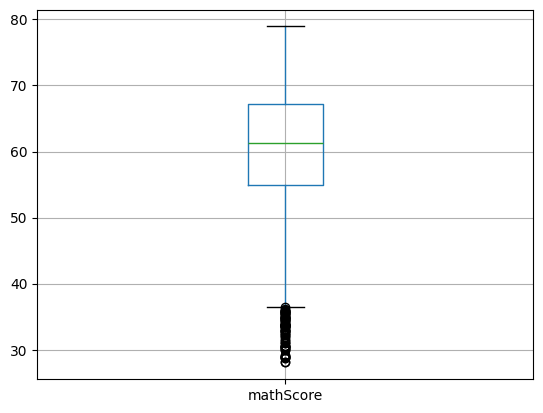

In [64]:
extended.loc[(extended["gender"]=='male')
       & (extended["race"]=='group A')
       & (extended['testPreparation']=='none'),["mathScore"]].boxplot()

plt.show()

### Corte categorico #2 DataSet Expandido

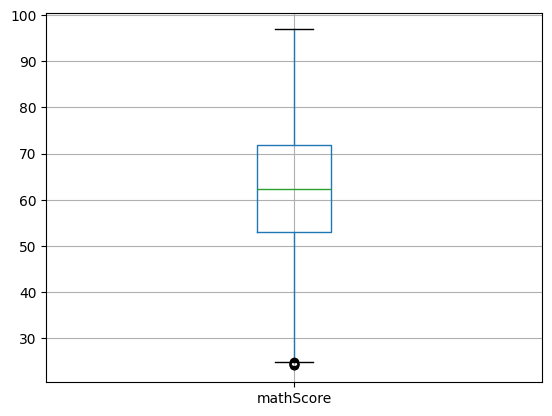

In [65]:
extended.loc[(extended["gender"]=='female')
       & (extended["race"]=='group B')
       & (extended['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

### Descripción columnas númericas DataSet original

In [ ]:
df[num_cols].describe()

,mathScore,readingScore,writingScore
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Descripción columnas númericas DataSet Simulado

In [66]:
df_extended.describe()

,id,mathScore,readingScore,writingScore
count,100000.00000,100000.000000,100000.000000,100000.000000
mean,20.20206,66.408724,69.354097,68.330068
std,11.10803,12.780793,12.282666,13.004500
min,0.00000,22.044135,23.127163,19.052439
25%,10.00000,57.707996,60.820059,59.171269
50%,19.00000,66.621770,69.781932,68.671727
75%,31.00000,75.381089,78.217916,77.904796
max,39.00000,99.986098,99.998726,99.996722


### Boxplots DataSet original

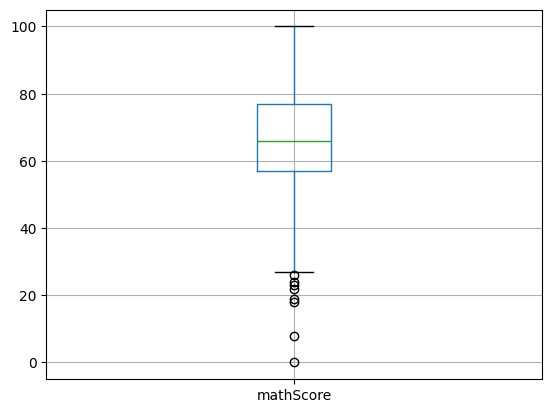

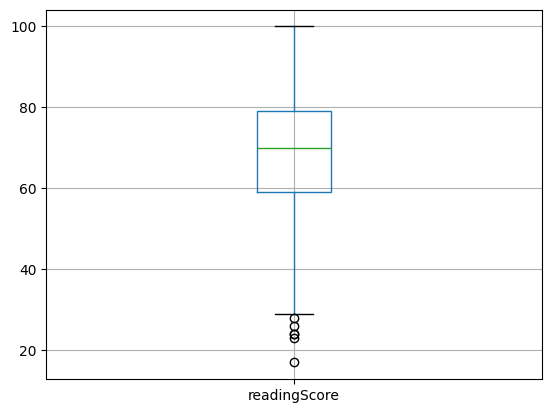

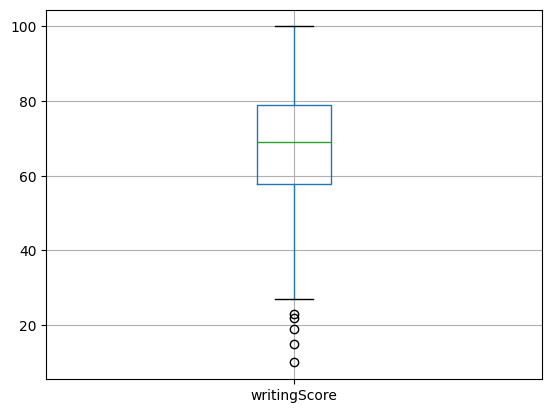

In [ ]:
for c in num_cols:
    df.loc[:,[c]].boxplot()
    plt.show()

### Boxplots DataSet expandido

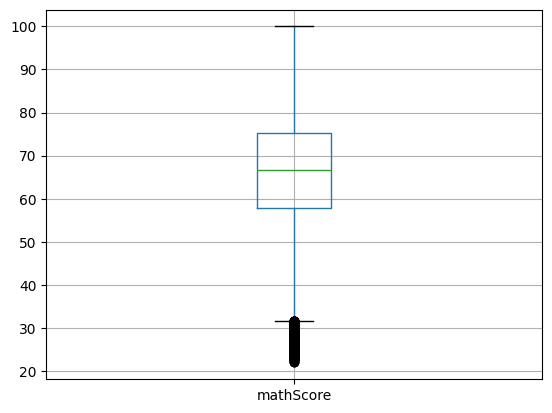

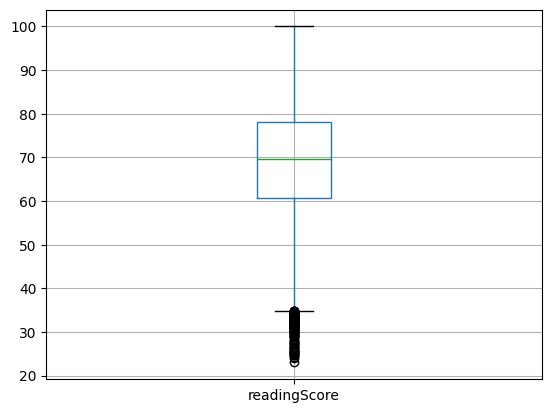

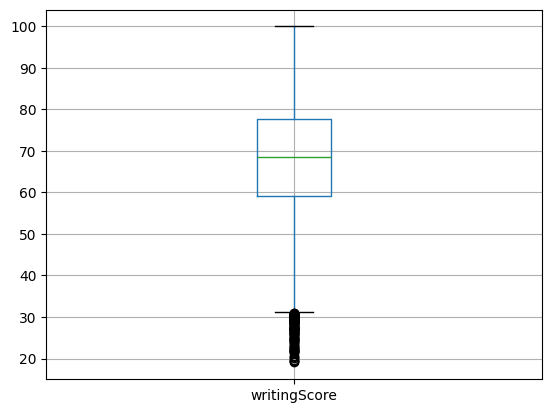

In [ ]:
for c in num_cols:
    df_extended.loc[:,[c]].boxplot()
    plt.show()

### Distribución DataSet original

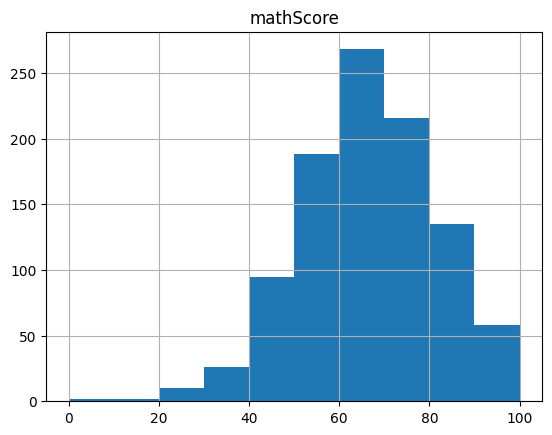

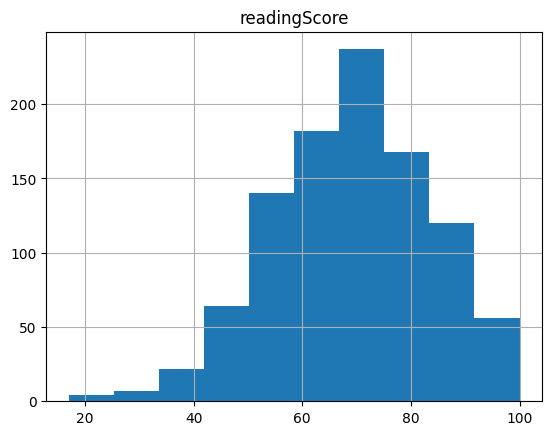

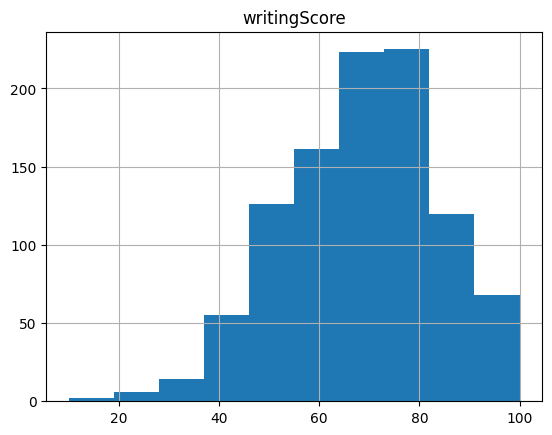

In [ ]:
for c in num_cols:
    df.loc[:,[c]].hist()
    plt.show()

### Distribución DataSet expandido

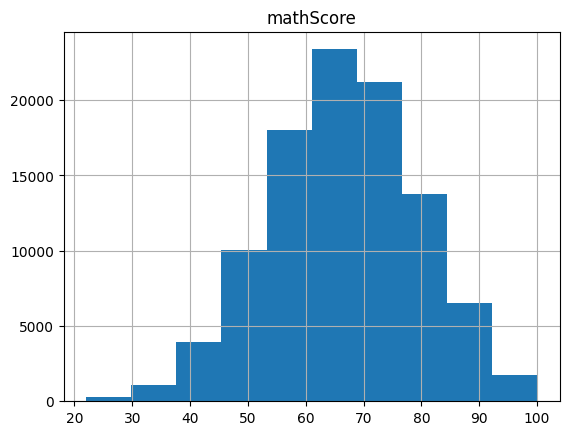

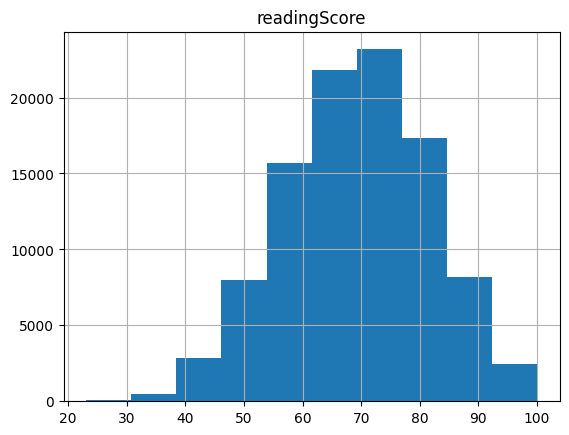

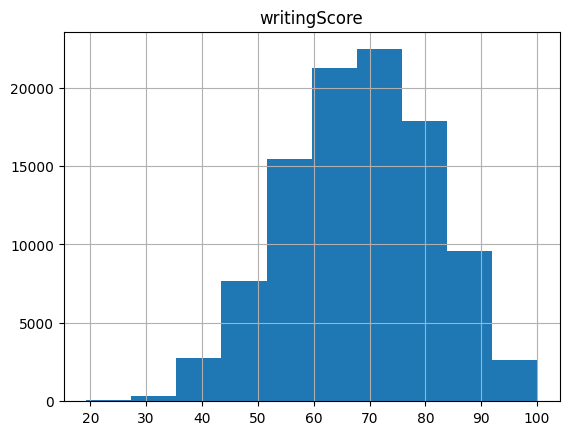

In [ ]:
for c in num_cols:
    df_extended.loc[:,[c]].hist()
    plt.show()

### Conclusiones

- La selección de un DataSet que tenía una distribución normal, nos sirvió para mantener esa normalida al momento de calcular las probabilidades que posteriormente se utilizarían en la expansión

- Los datos simulados se generaron respetando las distribuciones, correlaciones y patrones del DataSet original, por lo tanto las propiedades estadísticas (media, varianza, distribución, etc.) se mantienen estables.

- Se compararon las distribuciones de los datos simulados con respecto a los datos originales y observamos una correcta simulación, respetando la normalidad.